# Data Cleaning, Exploration, and Analysis of SPY Dataset

## 1. Data Cleaning and Understanding
The initial step in working with the SPY dataset involves data cleaning to ensure the data is prepared for analysis. This includes:
   - **Check Basic Statistics**: Summarize essential statistics of each feature, like mean, median, and standard deviation, to understand the overall distribution and variability within SPY stock data.
   - **Ensure Appropriate Data Types**: Confirm the correct data type for each column, particularly verifying date formats for time series analysis and ensuring numerical types for stock data columns.
   - **Handle Missing Values**: Identify and manage any missing values by either filling, interpolating, or removing them based on data patterns.
   - **Normalization or Scaling**: Normalize or scale the data as necessary, especially for models that require standardized feature scales.

## 2. Exploratory Data Analysis (EDA)
Conducting EDA on the SPY dataset helps to uncover patterns and trends essential for further analysis. This includes:
   - **Trend Visualization**: Plot the closing price over time to reveal general trends and cyclical patterns in SPY stock prices, providing insights into long-term performance.
   - **Daily Percentage Change**: Calculate and plot the daily percentage change to observe volatility and capture significant day-to-day movements in SPY.
   - **Rolling Means and Standard Deviations**: Compute rolling means and standard deviations to capture short-term trends and fluctuations, which help to identify periods of market stability or high activity.
   - **Outlier Detection**: Detect and investigate any extreme outliers in stock price data, giving insight into unusual market events affecting SPY.
   - **High/Low Return Analysis**: Analyze days with particularly high or low returns to understand market behavior and responses during significant events.

## 3. Seasonality and Trend Analysis
Exploring seasonality and trend within the SPY dataset offers deeper insights into stock price behavior over time:
   - **Decomposition of Time Series**: Using tools like `statsmodels`, decompose the time series into trend, seasonal, and residual components. This analysis helps uncover underlying seasonal cycles and general trends within SPY stock prices.

## 4. Volatility Analysis
Evaluating volatility provides insight into the risk associated with SPY, a moderate-risk, diversified asset:
   - **Rolling Means and Standard Deviations**: Calculate and visualize rolling means and standard deviations to understand SPY’s short-term trends and volatility, offering insights into market uncertainty and stability over time.

These tasks will build a comprehensive understanding of SPY’s stock price movements, highlighting the balanced, moderate-risk characteristics of this widely diversified index and informing future portfolio analysis.


In [19]:
import yfinance as yf
import pandas as pd
from datetime import datetime

# Define the start and end dates
start_date = '2015-01-01'
end_date = '2024-10-31'

# Directory to save CSV files
save_dir = "../data/"

# Define the assets and their descriptions
assets = {
    "SPY": "SPDR S&P 500 ETF Trust (SPY) - ETF tracking the S&P 500 Index, offering broad U.S. market exposure"
}

# Fetch and save data for each asset
for ticker, description in assets.items():
    print(f"Fetching data for {description}")
    
    # Fetch the data using yfinance
    data = yf.download(ticker, start=start_date, end=end_date)
    
    # Check if data was fetched successfully
    if not data.empty:
        # Select only the required columns
        data = data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
        
        # Reset the index to have Date as a column
        data.reset_index(inplace=True)
        
        # Save each dataset as a CSV file
        file_path = f"{save_dir}{ticker}_historical_data.csv"
        data.to_csv(file_path, index=False)
        print(f"Data for {ticker} saved to {file_path}")
    else:
        print(f"Data for {ticker} could not be fetched.")

Fetching data for SPDR S&P 500 ETF Trust (SPY) - ETF tracking the S&P 500 Index, offering broad U.S. market exposure


[*********************100%***********************]  1 of 1 completed

Data for SPY saved to ../data/SPY_historical_data.csv


In [21]:
# Load the dataset
import pandas as pd
df = pd.read_csv("../data/SPY_historical_data.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02 00:00:00+00:00,206.380005,206.880005,204.179993,205.429993,173.173782,121465900
1,2015-01-05 00:00:00+00:00,204.169998,204.369995,201.350006,201.720001,170.046341,169632600
2,2015-01-06 00:00:00+00:00,202.089996,202.720001,198.860001,199.820007,168.444672,209151400
3,2015-01-07 00:00:00+00:00,201.419998,202.720001,200.880005,202.309998,170.543655,125346700
4,2015-01-08 00:00:00+00:00,204.009995,206.160004,203.990005,205.899994,173.569931,147217800


In [22]:
# Fixing the date column
# Convert 'Date' column to datetime format if it isn't already
df['Date'] = pd.to_datetime(df['Date'])

# Format the 'Date' column to remove the time and timezone information
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,206.380005,206.880005,204.179993,205.429993,173.173782,121465900
1,2015-01-05,204.169998,204.369995,201.350006,201.720001,170.046341,169632600
2,2015-01-06,202.089996,202.720001,198.860001,199.820007,168.444672,209151400
3,2015-01-07,201.419998,202.720001,200.880005,202.309998,170.543655,125346700
4,2015-01-08,204.009995,206.160004,203.990005,205.899994,173.569931,147217800


In [23]:
import pandas as pd

# Step 1: Basic statistics
print("Basic Statistics:\n")
print(df.describe())  # Provides statistics like mean, std, min, and quartiles

print("\nData Types:\n")
print(df.dtypes)

# Step 3: Check for missing values
print("\nMissing Values:\n")
print(df.isnull().sum())  # Shows number of missing values in each column

Basic Statistics:

              Open         High          Low        Close    Adj Close  \
count  2474.000000  2474.000000  2474.000000  2474.000000  2474.000000   
mean    330.570376   332.368856   328.614426   330.623634   310.253154   
std     103.311248   103.840765   102.719137   103.324179   111.250655   
min     182.339996   184.100006   181.020004   182.860001   157.328567   
25%     242.302498   243.380005   240.692501   242.130001   214.822350   
50%     298.095001   299.324997   296.804993   298.089996   275.812332   
75%     416.240006   418.242500   413.687500   416.212502   402.297501   
max     585.909973   586.119995   582.580017   584.590027   584.590027   

             Volume  
count  2.474000e+03  
mean   8.810268e+07  
std    4.491678e+07  
min    2.027000e+07  
25%    5.960170e+07  
50%    7.696935e+07  
75%    1.027178e+08  
max    5.072443e+08  

Data Types:

Date          object
Open         float64
High         float64
Low          float64
Close        float

In [24]:
df.to_csv("../data/SPY_historical_data.csv")

Next, we are going to proceed to conducting the Exploratory Data Analysis(EDA) for the TSLA stock.``

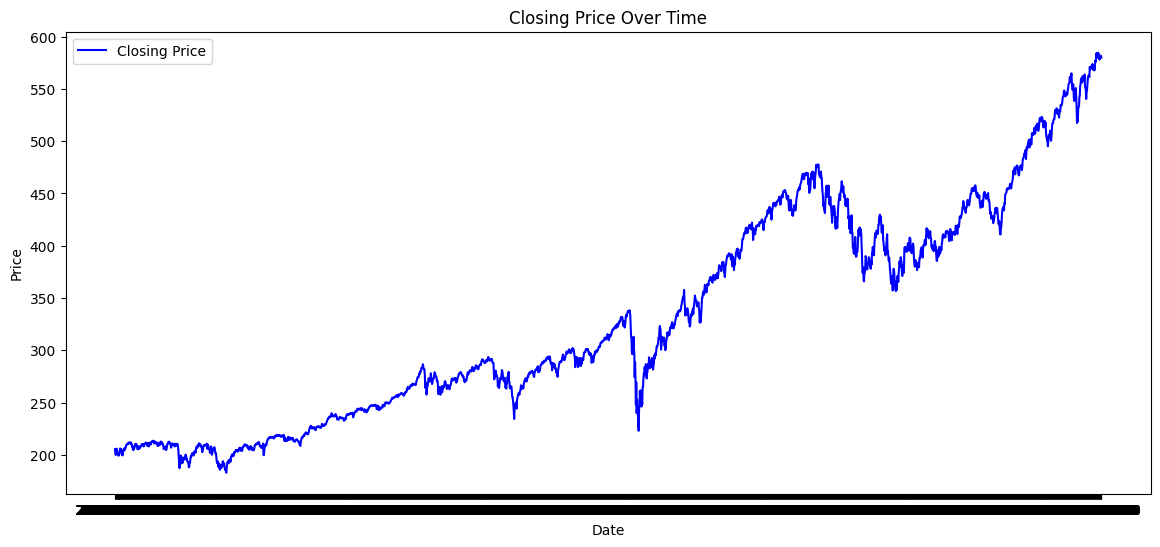

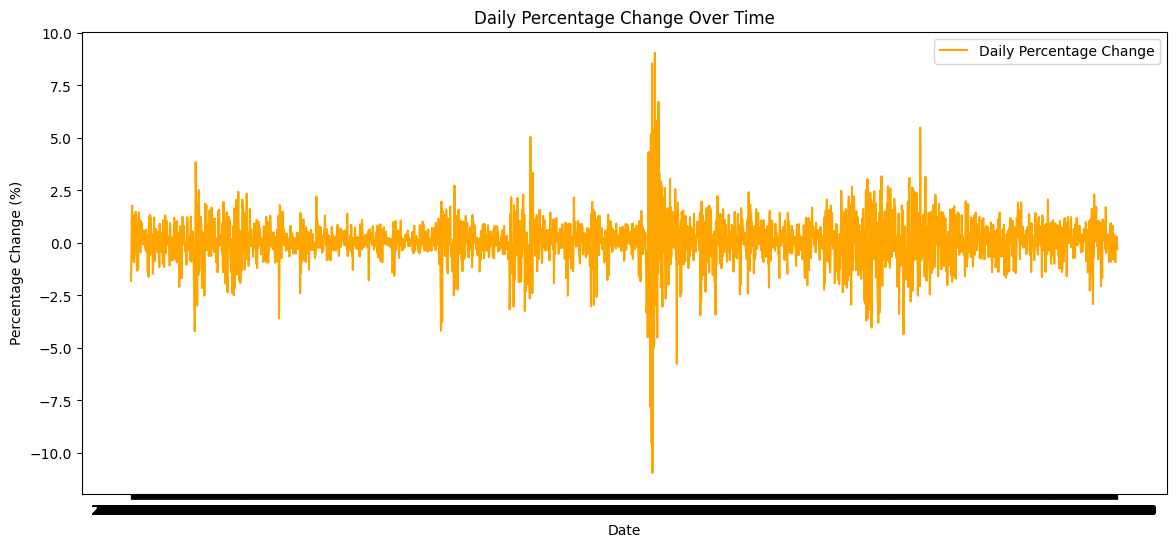

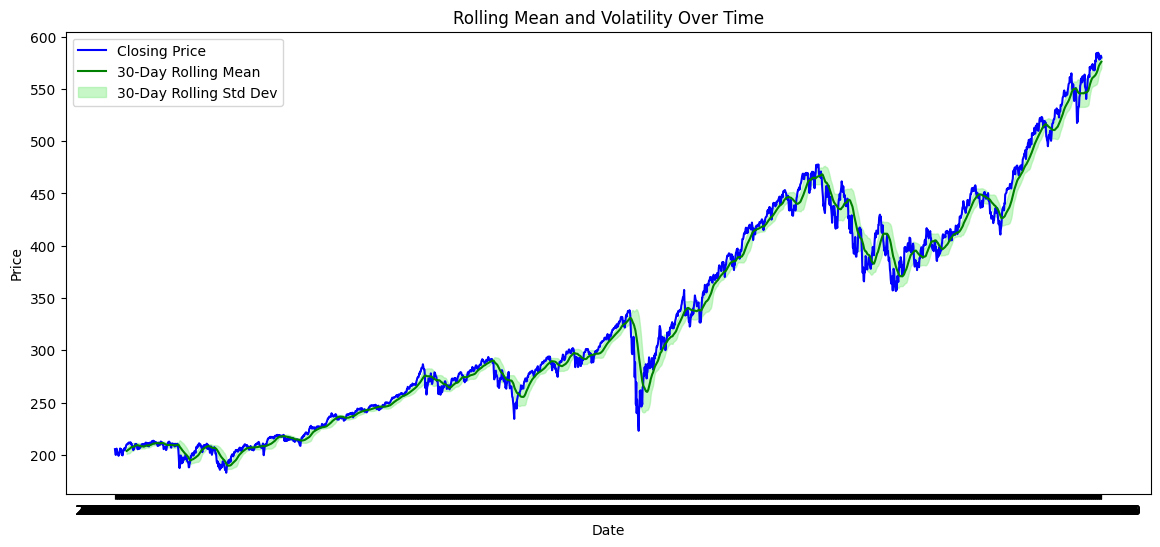

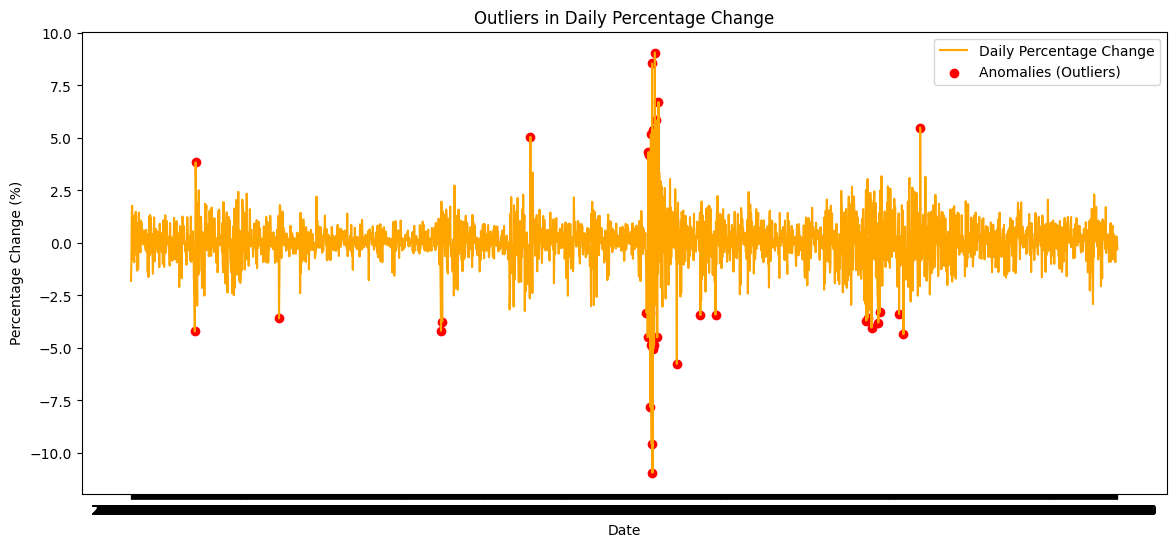

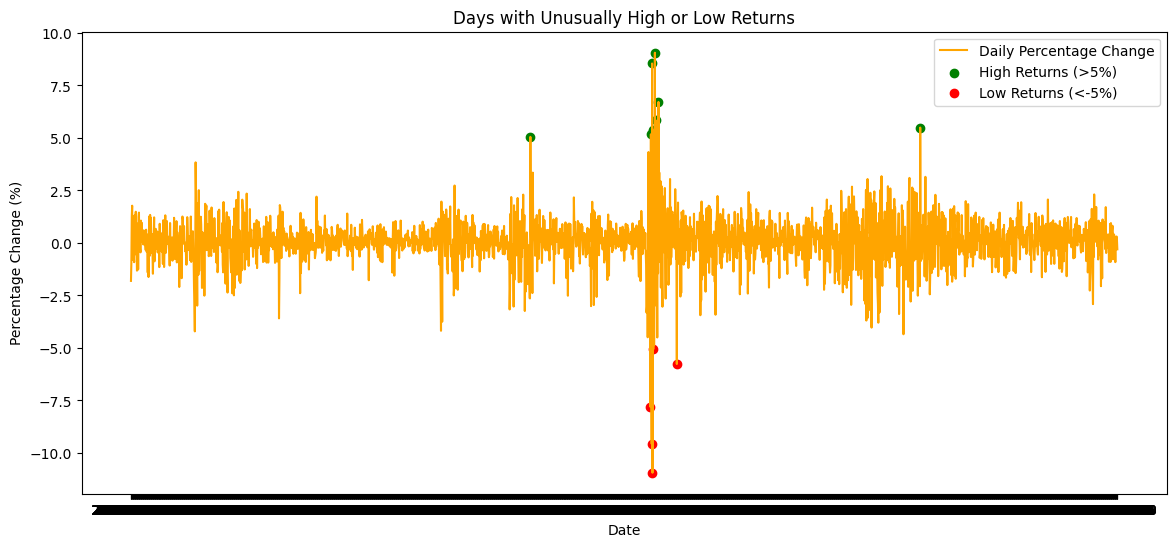

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df.set_index('Date', inplace=True)

# 1. Visualize the Closing Price over time
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Close'], color='blue', label='Closing Price')
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# 2. Calculate and plot the daily percentage change to observe volatility
df['Daily Change %'] = df['Close'].pct_change() * 100

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Daily Change %'], color='orange', label='Daily Percentage Change')
plt.title('Daily Percentage Change Over Time')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.legend()
plt.show()

# 3. Analyze volatility with rolling mean and rolling standard deviation
# Calculate a 30-day rolling mean and standard deviation for 'Close'
df['Rolling Mean'] = df['Close'].rolling(window=30).mean()
df['Rolling Std'] = df['Close'].rolling(window=30).std()

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Close'], color='blue', label='Closing Price')
plt.plot(df.index, df['Rolling Mean'], color='green', label='30-Day Rolling Mean')
plt.fill_between(df.index, 
                 df['Rolling Mean'] - df['Rolling Std'], 
                 df['Rolling Mean'] + df['Rolling Std'], 
                 color='lightgreen', alpha=0.5, label='30-Day Rolling Std Dev')
plt.title('Rolling Mean and Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# 4. Outlier detection using Z-score on daily percentage changes
# Anomalies or outliers beyond 3 standard deviations
df['Z-score'] = (df['Daily Change %'] - df['Daily Change %'].mean()) / df['Daily Change %'].std()
outliers = df[np.abs(df['Z-score']) > 3]

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Daily Change %'], color='orange', label='Daily Percentage Change')
plt.scatter(outliers.index, outliers['Daily Change %'], color='red', label='Anomalies (Outliers)', marker='o')
plt.title('Outliers in Daily Percentage Change')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.legend()
plt.show()

# 5. Analyze days with unusually high or low returns
# Highlight days with returns greater than 5% or lower than -5%
high_returns = df[df['Daily Change %'] > 5]
low_returns = df[df['Daily Change %'] < -5]

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Daily Change %'], color='orange', label='Daily Percentage Change')
plt.scatter(high_returns.index, high_returns['Daily Change %'], color='green', label='High Returns (>5%)', marker='o')
plt.scatter(low_returns.index, low_returns['Daily Change %'], color='red', label='Low Returns (<-5%)', marker='o')
plt.title('Days with Unusually High or Low Returns')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.legend()
plt.show()

Next we proceed to showcasing Seasonality and Trends.

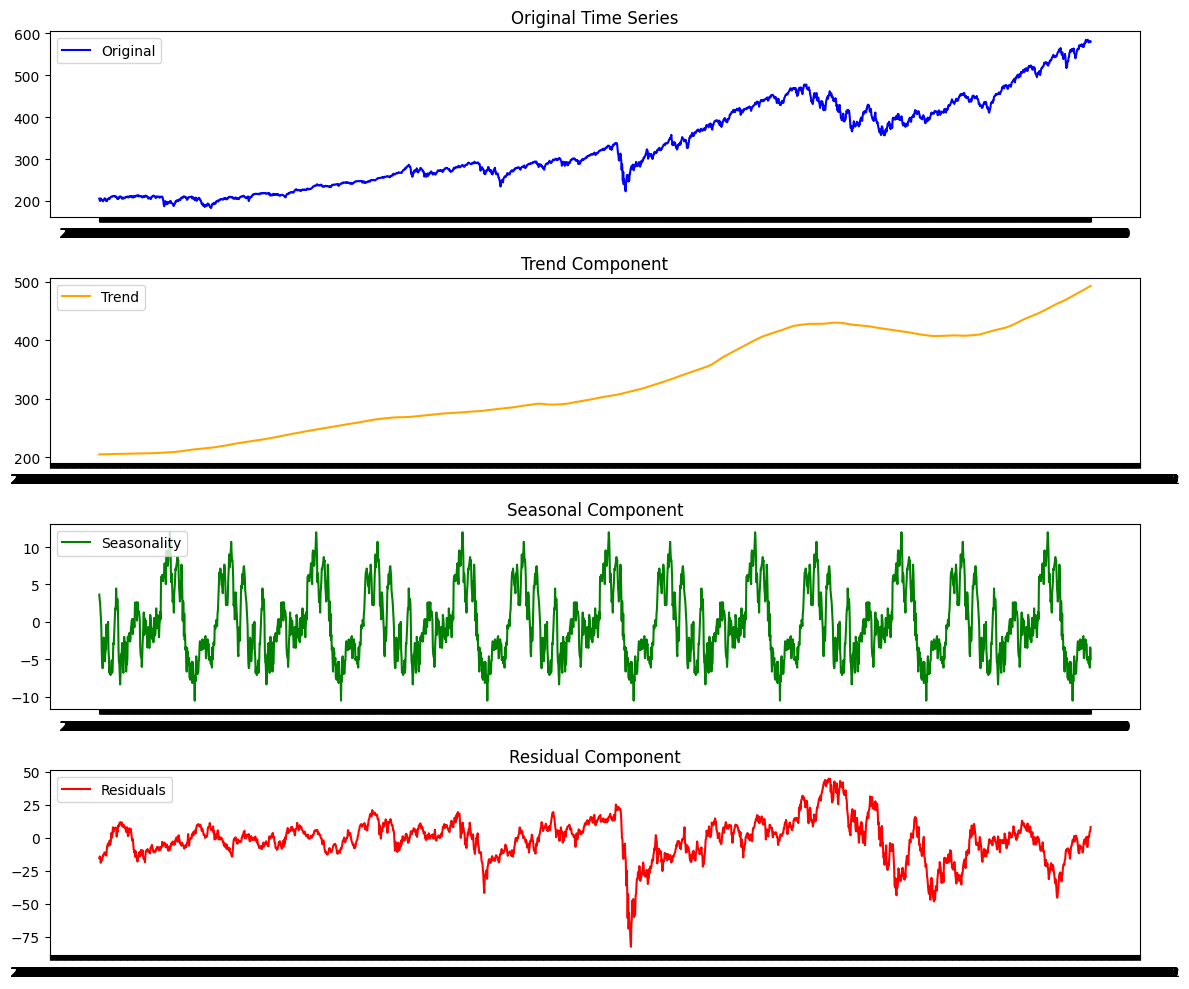

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Ensure the 'Date' column is the index and is in datetime format
df_1=pd.read_csv("../data/SPY_historical_data.csv")
df_1.set_index('Date', inplace=True)

# Decompose the time series
# Assuming daily frequency data with an annual seasonality period of 365 days
result = seasonal_decompose(df_1['Close'], model='additive', period=365)

# Plot the decomposed components
plt.figure(figsize=(12, 10))
plt.subplot(4, 1, 1)
plt.plot(df_1['Close'], label='Original', color='blue')
plt.legend(loc='upper left')
plt.title('Original Time Series')

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend', color='orange')
plt.legend(loc='upper left')
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonality', color='green')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residuals', color='red')
plt.legend(loc='upper left')
plt.title('Residual Component')

plt.tight_layout()
plt.show()

Next we proceed to analyzing volatility.

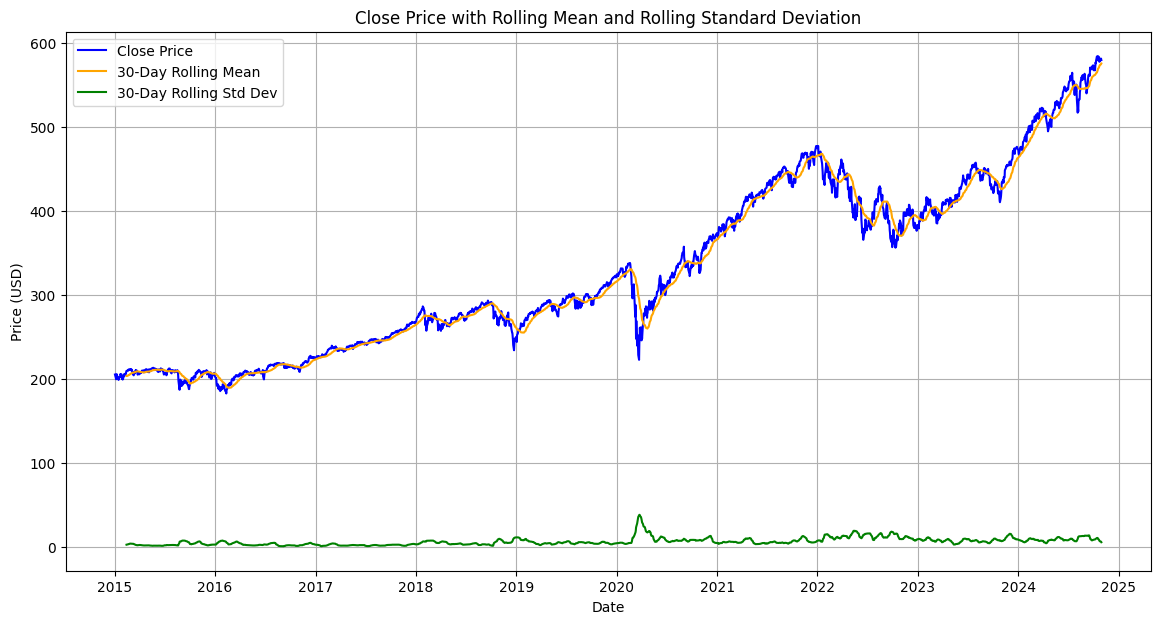

In [27]:

# Load the dataset
df_1 = pd.read_csv("../data/SPY_historical_data.csv")
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the 'Date' column is in datetime format
df_1['Date'] = pd.to_datetime(df_1['Date'])
df_1.set_index('Date', inplace=True)

# Set the window size (e.g., 30 days) for calculating the rolling mean and standard deviation
window_size = 30

# Calculate the rolling mean and rolling standard deviation
df_1['Rolling_Mean'] = df_1['Close'].rolling(window=window_size).mean()
df_1['Rolling_Std'] = df_1['Close'].rolling(window=window_size).std()

# Plotting the rolling mean and rolling standard deviation to visualize volatility
plt.figure(figsize=(14, 7))

# Plot the original closing price
plt.plot(df_1['Close'], color='blue', label='Close Price')

# Plot the rolling mean
plt.plot(df_1['Rolling_Mean'], color='orange', label=f'{window_size}-Day Rolling Mean')

# Plot the rolling standard deviation
plt.plot(df_1['Rolling_Std'], color='green', label=f'{window_size}-Day Rolling Std Dev')

plt.title('Close Price with Rolling Mean and Rolling Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()
